In [1]:
import pandas as pd
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('Data/fake_news/train.csv', sep=';', index_col=0)
test = pd.read_csv('Data/fake_news/test.csv', sep=';', index_col=0)
evaluation = pd.read_csv('Data/fake_news/evaluation.csv', sep=';', index_col=0)

In [3]:
train.isna().sum()

title    0
text     0
label    0
dtype: int64

In [4]:
test.isna().sum()

title    0
text     0
label    0
dtype: int64

In [5]:
evaluation.isna().sum()

title    0
text     0
label    0
dtype: int64

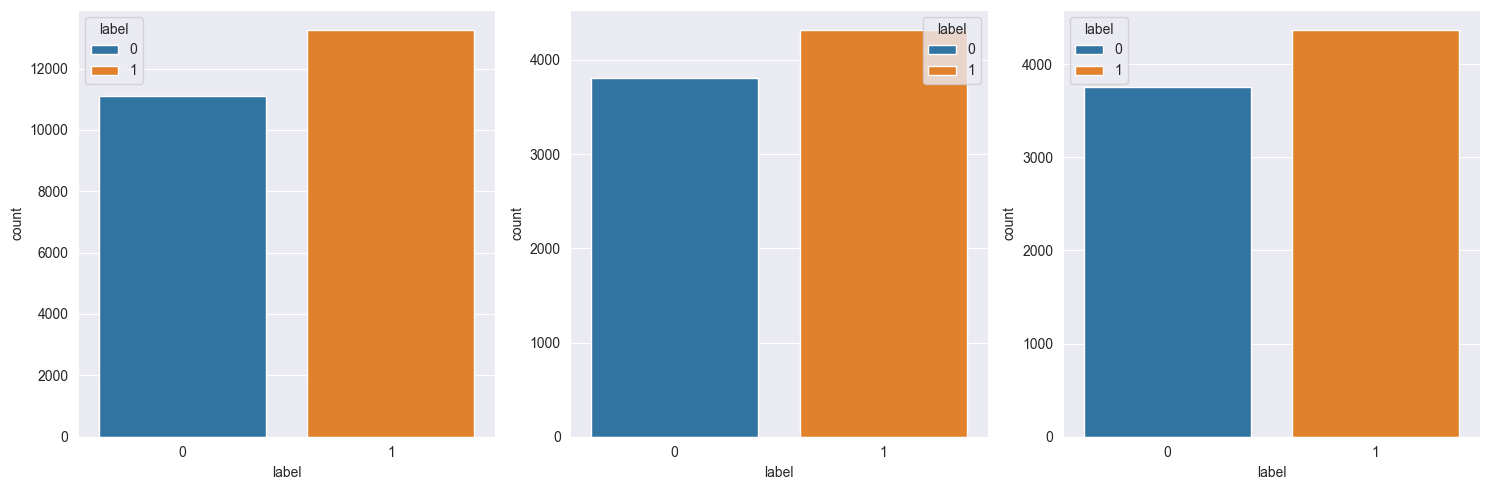

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x='label', hue='label', data=train, ax=ax[0])
sns.countplot(x='label', hue='label', data=evaluation, ax=ax[1])
sns.countplot(x='label', hue='label', data=test, ax=ax[2])

fig.tight_layout()
plt.show()

In [9]:
import numpy as np
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = stopwords.words('english')


def clean_text(text):
    text = text.lower()
    cleaned_text = re.sub(r"[^\w\s]", "", text)
    cleaned_text = re.sub(r"\d+", "", cleaned_text)
    return [word for word in cleaned_text.split(" ") if word not in stopwords]

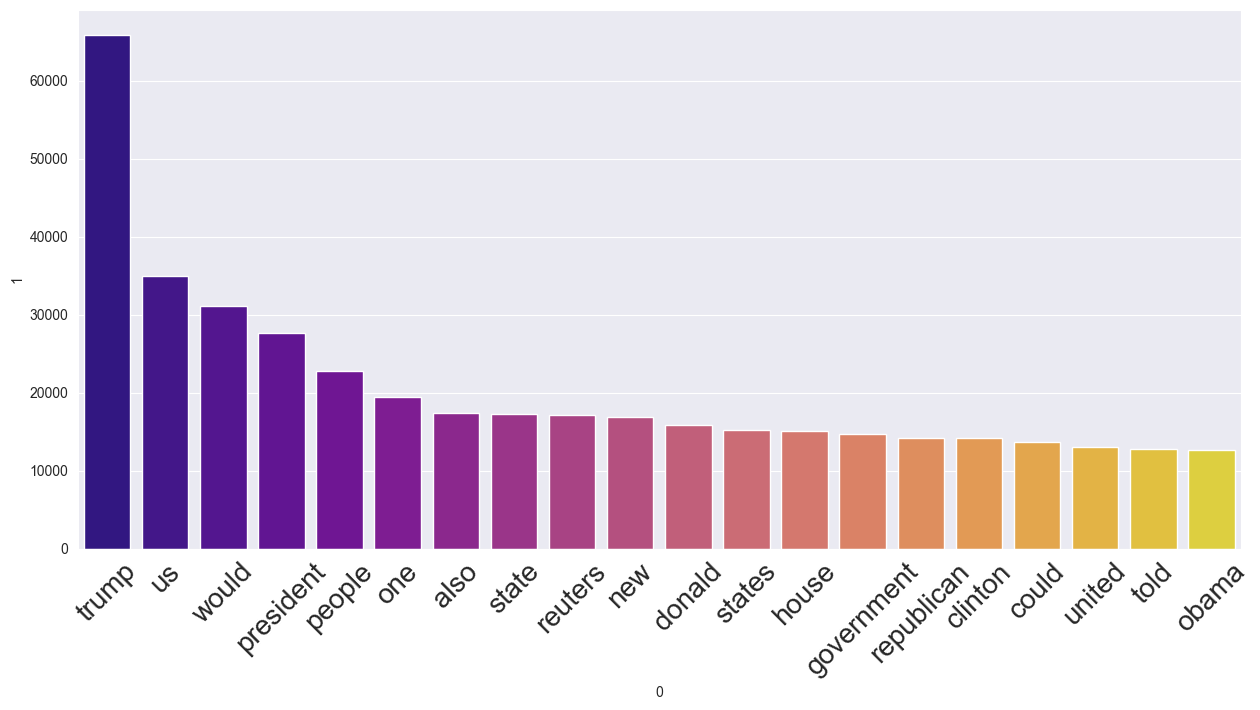

In [30]:
words = np.concatenate([np.array(text)
                        for text in map(lambda text: clean_text(text), train.text.to_numpy())])
counter = Counter(words)

plt.figure(figsize=(15, 7))
sns.barplot(data=pd.DataFrame(counter.most_common(22)[2:]), x=0, y=1, hue=0, palette='plasma')
plt.xticks(rotation=45, size=20)
plt.show()

del words
del counter

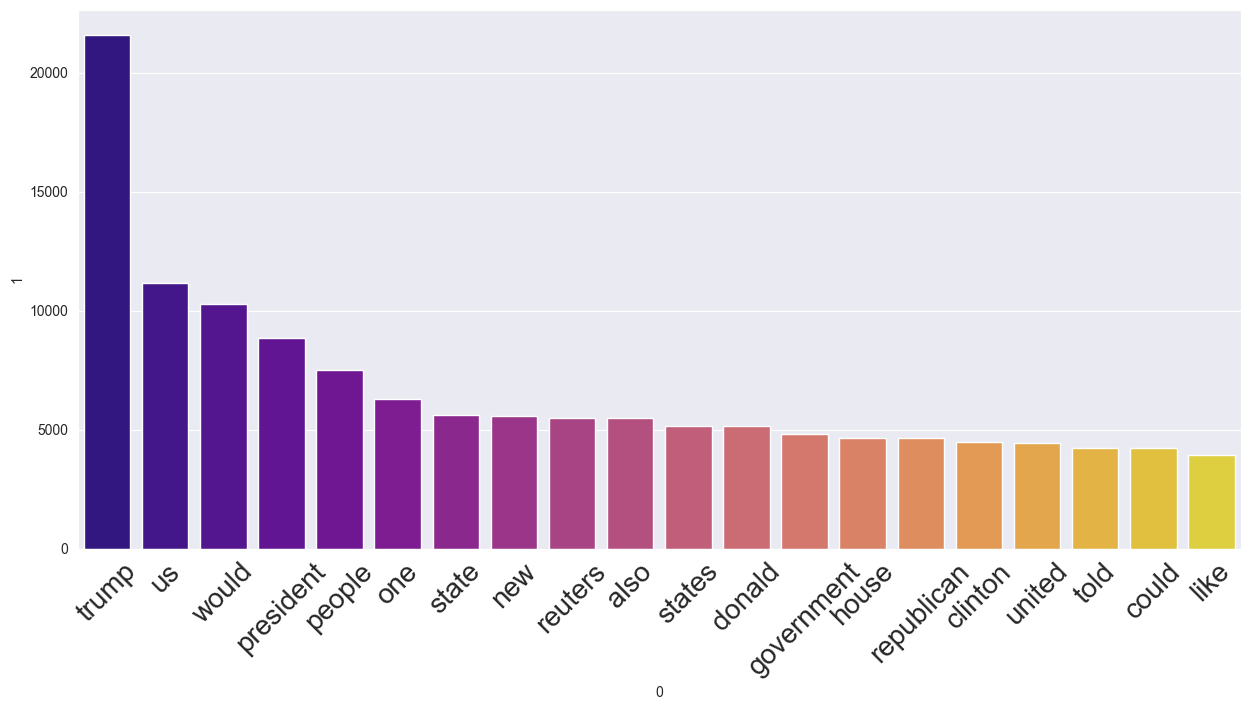

In [33]:
words = np.concatenate([np.array(text)
                        for text in map(lambda text: clean_text(text), evaluation.text.to_numpy())])
counter = Counter(words)

plt.figure(figsize=(15, 7))
sns.barplot(data=pd.DataFrame(counter.most_common(22)[2:]), x=0, y=1, hue=0, palette='plasma')
plt.xticks(rotation=45, size=20)
plt.show()

del words
del counter

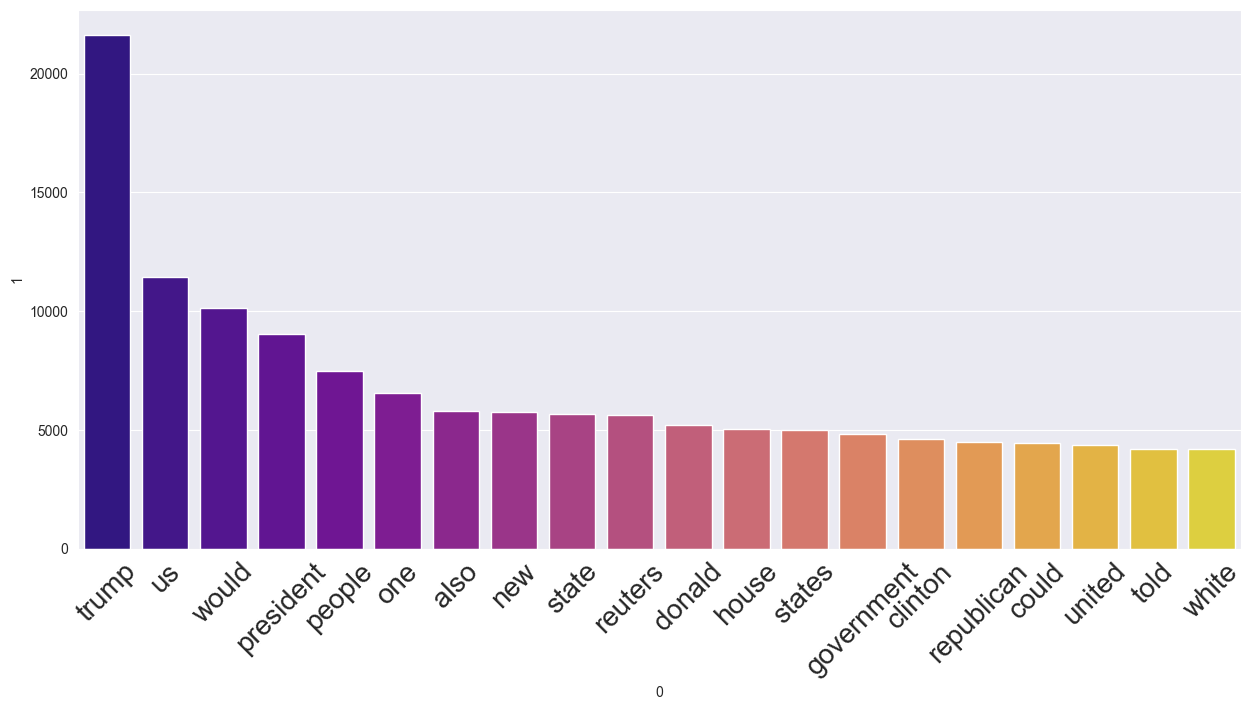

In [35]:
words = np.concatenate([np.array(text)
                        for text in map(lambda text: clean_text(text), test.text.to_numpy())])
counter = Counter(words)

plt.figure(figsize=(15, 7))
sns.barplot(data=pd.DataFrame(counter.most_common(22)[2:]), x=0, y=1, hue=0, palette='plasma')
plt.xticks(rotation=45, size=20)
plt.show()

del words
del counter

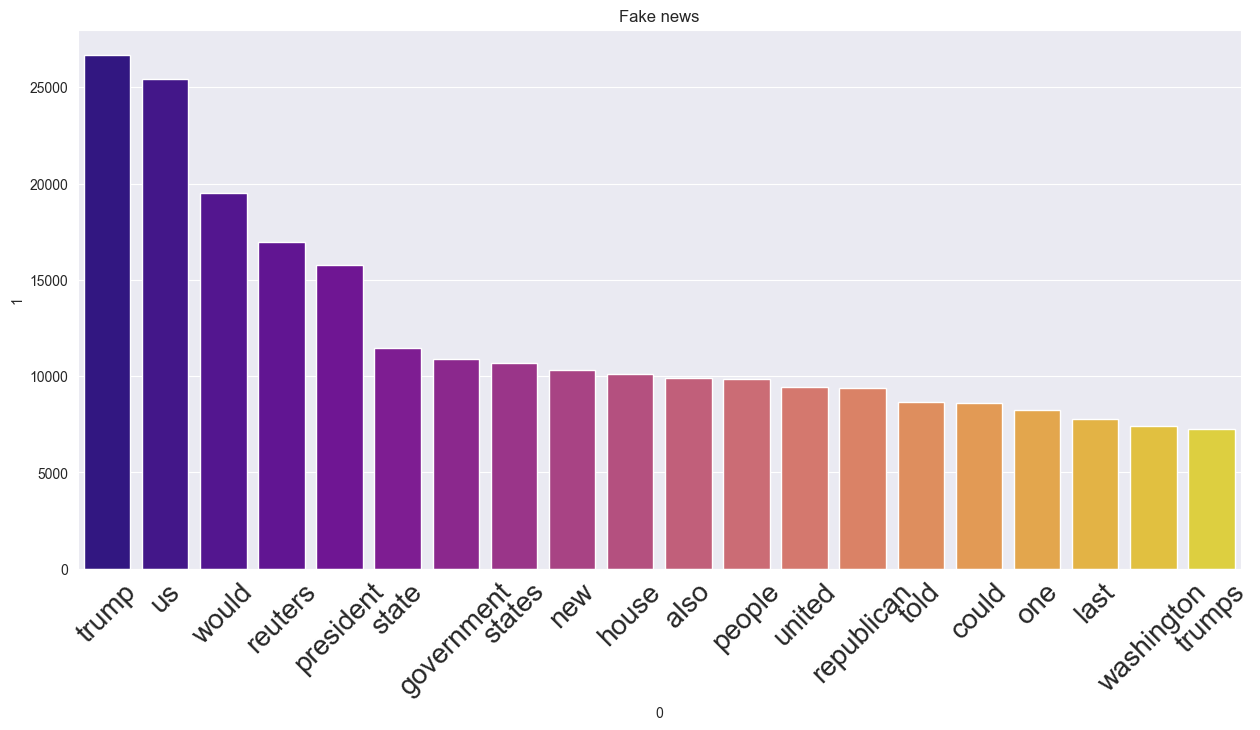

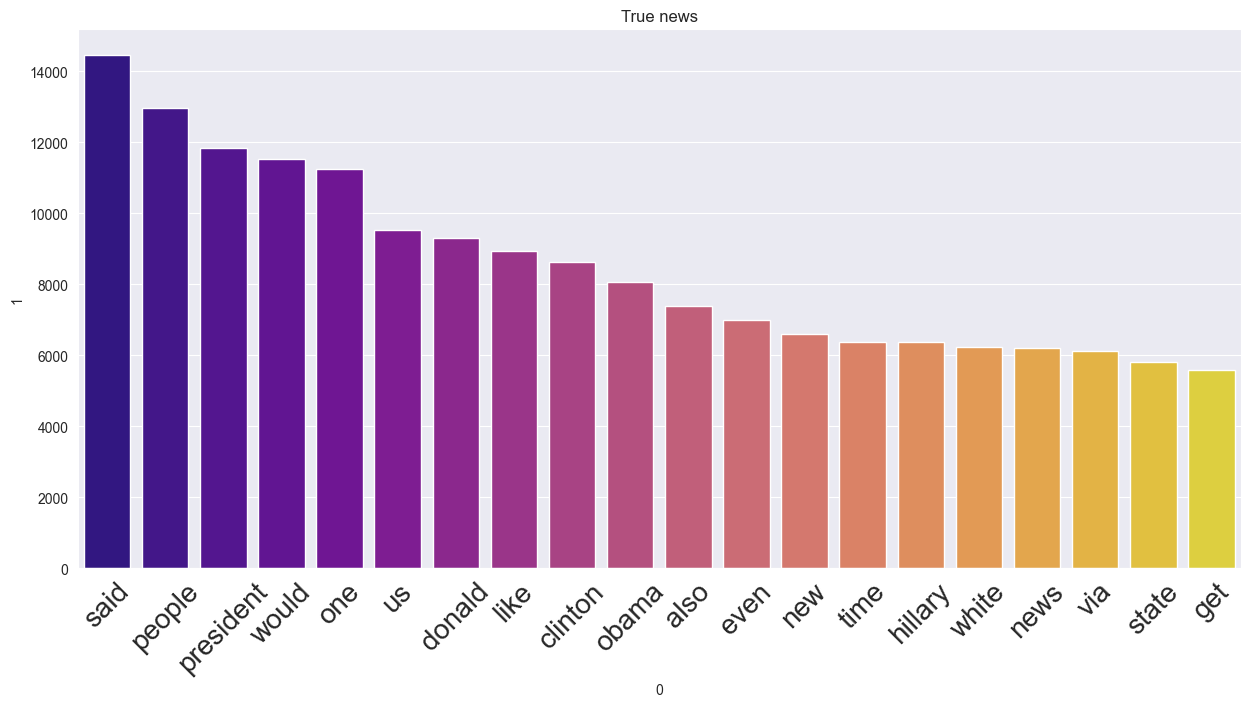

In [39]:
fake_words = np.concatenate([np.array(text) for text in
                             map(lambda text: clean_text(text), train[train['label'] == 1].text.to_numpy())])

true_words = np.concatenate([np.array(text) for text in
                             map(lambda text: clean_text(text), train[train['label'] == 0].text.to_numpy())])

fake_counter = Counter(fake_words)
true_counter = Counter(true_words)

plt.figure(figsize=(15, 7))
plt.title('Fake news')
sns.barplot(data=pd.DataFrame(fake_counter.most_common(22)[2:]), x=0, y=1, hue=0, palette='plasma')
plt.xticks(rotation=45, size=20)
plt.show()

plt.figure(figsize=(15, 7))
plt.title('True news')
sns.barplot(data=pd.DataFrame(true_counter.most_common(22)[2:]), x=0, y=1, hue=0, palette='plasma')
plt.xticks(rotation=45, size=20)
plt.show()

del fake_words
del true_words
del fake_counter
del true_counter

In [6]:
class TitleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english')
        self.pca = PCA(n_components=15)
        self.kmeans = KMeans(n_clusters=10)
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        tfidf_matrix = self.vectorizer.fit_transform(raw_documents=X)
        pca_res = self.pca.fit_transform(tfidf_matrix)
        self.scaler.fit(self.kmeans.fit_transform(pca_res))
        return self

    def transform(self, X):
        tfidf_matrix = self.vectorizer.transform(X)
        pca_res = self.pca.transform(tfidf_matrix)
        res = self.kmeans.transform(pca_res)
        return pd.concat([pd.Series(self.kmeans.predict(pca_res)),
                          pd.DataFrame(self.scaler.transform(res))], axis=1)

    @staticmethod
    def get_feature_names_out():
        return ['title_cluster', 'title_dist2cluster1', 'title_dist2cluster2',
                'title_dist2cluster3', 'title_dist2cluster4', 'title_dist2cluster5',
                'title_dist2cluster66', 'title_dist2cluster7', 'title_dist2cluster8',
                'title_dist2cluster9', 'title_dist2cluster10']

In [7]:
class TextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english')
        self.pca = PCA(n_components=15)
        self.kmeans = KMeans(n_clusters=10)
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        tfidf_matrix = self.vectorizer.fit_transform(raw_documents=X)
        pca_res = self.pca.fit_transform(tfidf_matrix)
        self.scaler.fit(self.kmeans.fit_transform(pca_res))
        return self

    def transform(self, X):
        tfidf_matrix = self.vectorizer.transform(X)
        pca_res = self.pca.transform(tfidf_matrix)
        res = self.kmeans.transform(pca_res)
        return pd.concat([pd.Series(self.kmeans.predict(pca_res)),
                          pd.DataFrame(self.scaler.transform(res))], axis=1)

    @staticmethod
    def get_feature_names_out():
        return ['text_cluster', 'text_dist2cluster1', 'text_dist2cluster2',
                'text_dist2cluster3', 'text_dist2cluster4', 'text_dist2cluster5',
                'text_dist2cluster66', 'text_dist2cluster7', 'text_dist2cluster8',
                'text_dist2cluster9', 'text_dist2cluster10']

In [8]:
X_train, y_train = train.drop(['label'], axis=1), train['label']
X_val, y_val = evaluation.drop(['label'], axis=1), evaluation['label']
X_test, y_test = test.drop(['label'], axis=1), test['label']

In [9]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier

t = [
    ('TitleTransformer', TitleTransformer(), 'title'),
    ('TextTransformer', TextTransformer(), 'text')
]

pipe = Pipeline(steps=[('col_transform', ColumnTransformer(transformers=t,
                                                           remainder='passthrough',
                                                           force_int_remainder_cols=False)),
                       ('catboost', CatBoostClassifier())])

pipe.fit(X_train, y_train)


KeyboardInterrupt



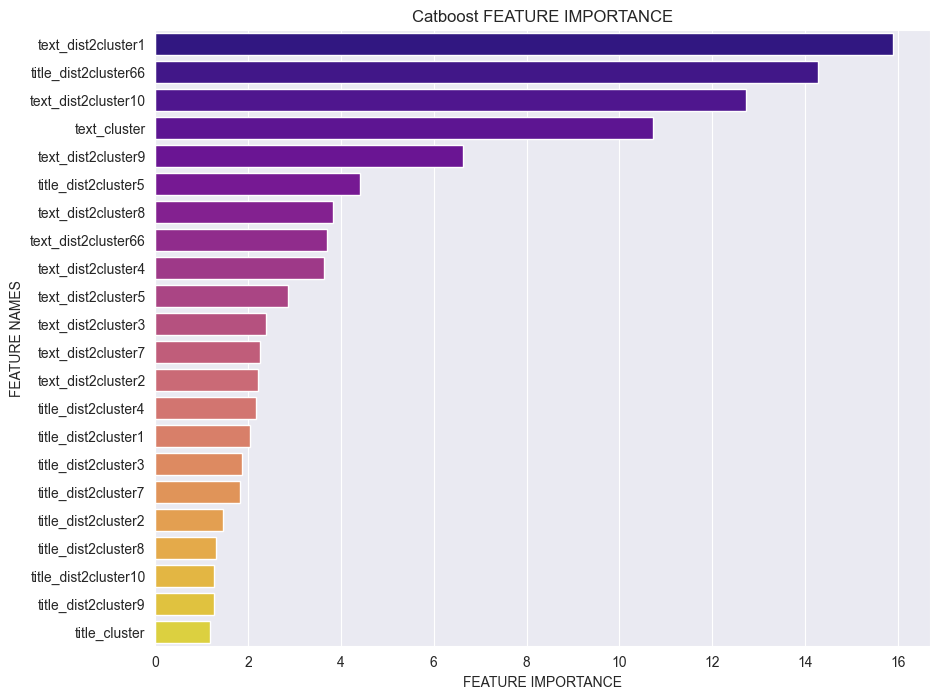

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))

    palette = sns.color_palette('plasma', len(fi_df))
    sns.barplot(x=fi_df['feature_importance'],
                y=fi_df['feature_names'],
                palette=palette,
                hue=fi_df['feature_names'],
                legend=False)

    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


plot_feature_importance(
    pipe.named_steps['catboost'].feature_importances_,
    np.concatenate([TitleTransformer.get_feature_names_out(),
                    TextTransformer.get_feature_names_out()]),
    'Catboost')

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_val, pipe.predict(X_val)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3803
           1       0.93      0.94      0.93      4314

    accuracy                           0.93      8117
   macro avg       0.93      0.93      0.93      8117
weighted avg       0.93      0.93      0.93      8117



0.9936564714056687

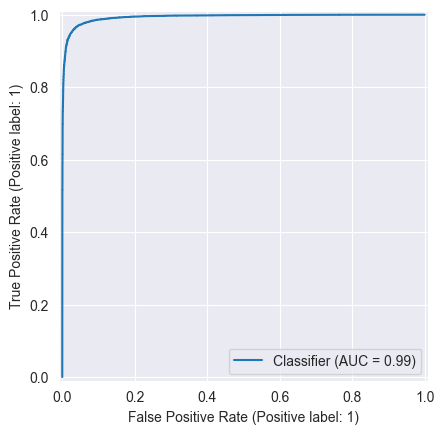

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_train, pipe.predict_proba(X_train)[:, 1])
RocCurveDisplay.from_predictions(y_train, pipe.predict_proba(X_train)[:, 1])

auc(fpr, tpr)

0.978923807925105

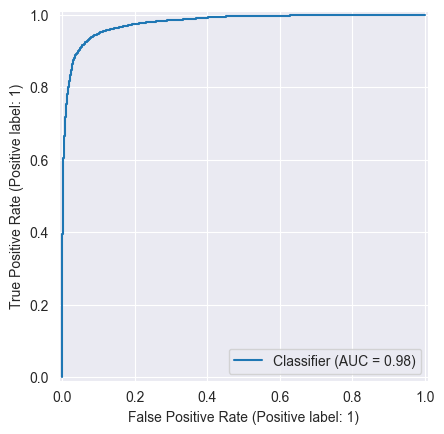

In [47]:
fpr, tpr, thresholds = roc_curve(y_val, pipe.predict_proba(X_val)[:, 1])
RocCurveDisplay.from_predictions(y_val, pipe.predict_proba(X_val)[:, 1])

auc(fpr, tpr)

0.9813950855813974

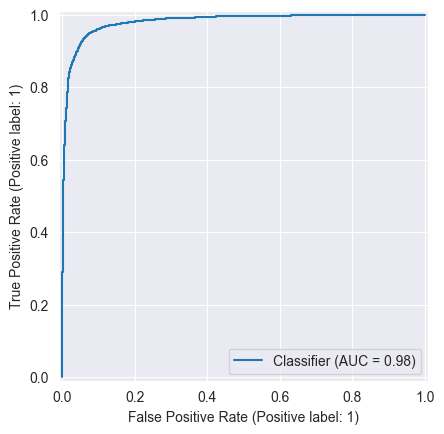

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])
RocCurveDisplay.from_predictions(y_test, pipe.predict_proba(X_test)[:, 1])

auc(fpr, tpr)

0.9949725854621387

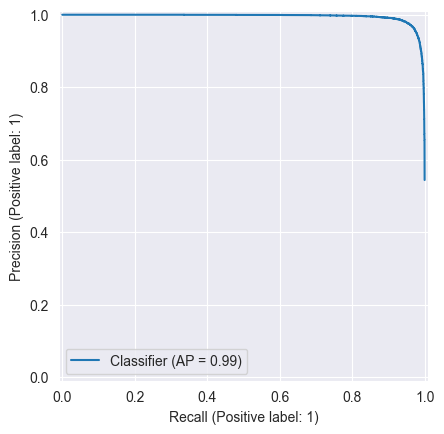

In [57]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(y_train, pipe.predict_proba(X_train)[:, 1])
PrecisionRecallDisplay.from_predictions(y_train, pipe.predict_proba(X_train)[:, 1])
auc(x=recall, y=precision)

0.982326252287734

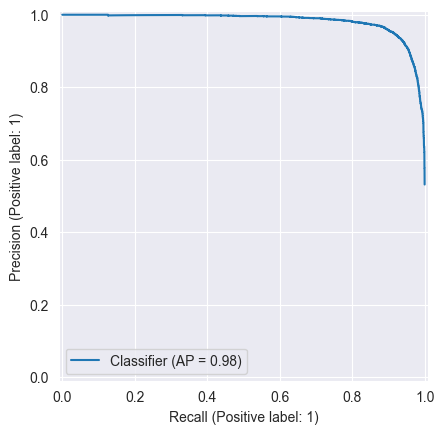

In [58]:
precision, recall, thresholds = precision_recall_curve(y_val, pipe.predict_proba(X_val)[:, 1])
PrecisionRecallDisplay.from_predictions(y_val, pipe.predict_proba(X_val)[:, 1])
auc(x=recall, y=precision)

0.9839537746246023

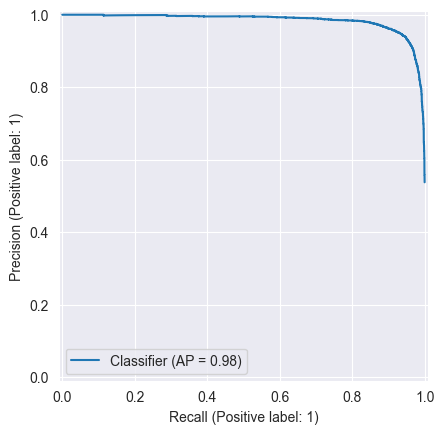

In [59]:
precision, recall, thresholds = precision_recall_curve(y_test, pipe.predict_proba(X_test)[:, 1])
PrecisionRecallDisplay.from_predictions(y_test, pipe.predict_proba(X_test)[:, 1])
auc(x=recall, y=precision)

In [10]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

model = StackingClassifier(estimators=[('pipe', pipe)],
                           final_estimator=StackingClassifier(estimators=[
                               ('catboost', CatBoostClassifier())],
                               final_estimator=LogisticRegression()))
model.fit(X_train, y_train)

Learning rate set to 0.040271
0:	learn: 0.6535871	total: 168ms	remaining: 2m 48s
1:	learn: 0.6190279	total: 179ms	remaining: 1m 29s
2:	learn: 0.5880273	total: 188ms	remaining: 1m 2s
3:	learn: 0.5625194	total: 198ms	remaining: 49.3s
4:	learn: 0.5396748	total: 208ms	remaining: 41.4s
5:	learn: 0.5172364	total: 219ms	remaining: 36.2s
6:	learn: 0.4983682	total: 229ms	remaining: 32.4s
7:	learn: 0.4814946	total: 237ms	remaining: 29.4s
8:	learn: 0.4657929	total: 246ms	remaining: 27.1s
9:	learn: 0.4520511	total: 255ms	remaining: 25.2s
10:	learn: 0.4378003	total: 263ms	remaining: 23.6s
11:	learn: 0.4261268	total: 270ms	remaining: 22.3s
12:	learn: 0.4148719	total: 278ms	remaining: 21.1s
13:	learn: 0.4059950	total: 285ms	remaining: 20.1s
14:	learn: 0.3972940	total: 293ms	remaining: 19.3s
15:	learn: 0.3887183	total: 301ms	remaining: 18.5s
16:	learn: 0.3797487	total: 308ms	remaining: 17.8s
17:	learn: 0.3719737	total: 316ms	remaining: 17.2s
18:	learn: 0.3666176	total: 323ms	remaining: 16.7s
19:	learn

StackingClassifier(estimators=[('pipe',
                                Pipeline(steps=[('col_transform',
                                                 ColumnTransformer(force_int_remainder_cols=False,
                                                                   remainder='passthrough',
                                                                   transformers=[('TitleTransformer',
                                                                                  TitleTransformer(),
                                                                                  'title'),
                                                                                 ('TextTransformer',
                                                                                  TextTransformer(),
                                                                                  'text')])),
                                                ('catboost',
                                                 <catboost.core.CatBoostClassifier object at 0x0000020F8E02EDA0>)]))],
                   final_estimator=StackingClassifier(estimators=[('catboost',
                                                                   <catboost.core.CatBoostClassifier object at 0x0000020F8E02DAB0>)],
                                                      final_estimator=LogisticRegression()))